In [187]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [124]:
df_listing = pd.read_csv('./Data/August/listings.csv', compression='gzip', encoding='utf-8')
df_listing_zip = pd.read_csv('./Data/August/listings.csv.gz')
df_calender_zip = pd.read_csv('./Data/August/calendar.csv.gz', low_memory=False)
df_reviews_zip = pd.read_csv('./Data/August/reviews.csv.gz', low_memory=False)
df_reviews = pd.read_csv('./Data/August/reviews.csv', low_memory=False)
df_neighbourhoods = pd.read_csv('./Data/August/reviews.csv')

In [73]:
df_listing_zip.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [74]:
pd.options.display.max_columns = 75

In [75]:
df_listing_zip.head(3)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1419,https://www.airbnb.com/rooms/1419,20240807164212,2024-08-08,previous scrape,Beautiful home in amazing area!,"This large, family home is located in one of T...",The apartment is located in the Ossington stri...,https://a0.muscache.com/pictures/76206750/d643...,1565,https://www.airbnb.com/users/show/1565,Alexandra,2008-08-08,"Vancouver, Canada","I live in Vancouver, Canada with my husband an...",NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/7aeea...,https://a0.muscache.com/im/pictures/user/7aeea...,Commercial Drive,1.0,1.0,"['email', 'phone']",t,t,Neighborhood highlights,Little Portugal,NaN,43.64590,-79.42423,Entire home,Entire home/apt,10,NaN,3 baths,5.0,NaN,"[""Shampoo"", ""Kitchen"", ""Heating"", ""First aid k...",NaN,28,730,28,28,730,730,28.0,730.0,NaN,t,0,0,0,0,2024-08-08,6,0,0,2015-07-19,2017-08-07,5.00,5.00,5.00,5.00,5.00,5.00,5.00,NaN,f,1,1,0,0,0.05
1,573892,https://www.airbnb.com/rooms/573892,20240807164212,2024-08-08,city scrape,DOWNTOWN TORONTO LUXURY FURNISHED CORPORATE SUITE,Amazing location in the heart of downtown Toro...,"Great location close to the Lake, sporting eve...",https://a0.muscache.com/pictures/60047477/c996...,2175675,https://www.airbnb.com/users/show/2175675,Frank,2012-04-19,"Toronto, Canada","FULLY FURNISHED 1 BEDROOM, 1 BEDROOM PLUS DEN ...",within an hour,100%,94%,f,https://a0.muscache.com/im/users/2175675/profi...,https://a0.muscache.com/im/users/2175675/profi...,Entertainment District,6.0,6.0,"['email', 'phone']",t,t,Neighborhood highlights,Waterfront Communities-The Island,NaN,43.64278,-79.37985,Entire condo,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Shampoo"", ""Long term stays allowed"", ""Elevat...",$119.00,28,1125,28,28,1125,1125,28.0,1125.0,NaN,t,3,7,37,312,2024-08-08,86,3,1,2012-09-01,2024-07-22,4.83,4.79,4.83,4.87,4.88,4.94,4.75,NaN,f,4,4,0,0,0.59
2,593324,https://www.airbnb.com/rooms/593324,20240807164212,2024-08-08,previous scrape,Charming Victorian in Leslieville,Great space in a great neighbourhood!,My neighbourhood known as Riverside (or to Rea...,https://a0.muscache.com/pictures/65059208/0f30...,2929774,https://www.airbnb.com/users/show/2929774,Susan,2012-07-13,"Toronto, Canada",I am a retired teacher who travels a great dea...,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/2929774/profi...,https://a0.muscache.com/im/users/2929774/profi...,Riverdale,1.0,2.0,"['email', 'phone']",t,t,Neighborhood highlights,South Riverdale,NaN,43.66114,-79.34742,Entire home,Entire home/apt,3,NaN,1.5 baths,2.0,NaN,"[""Shampoo"", ""Kitchen"", ""Heating"", ""First aid k...",NaN,28,30,28,28,30,30,28.0,30.0,NaN,t,0,0,0,0,2024-08-08,7,0,0,2012-10-28,2015-10-06,4.86,4.83,4.83,5.00,4.83,5.00,4.83

In [76]:
# Host original Location
df_listing_zip['host_location'].value_counts()

host_location
Toronto, Canada                  14452
Canada                             191
Montreal, Canada                   131
Mississauga, Canada                106
Vaughan, Canada                     82
                                 ...  
Durban, South Africa                 1
Mont-Tremblant, Canada               1
Kelowna, Canada                      1
Esplugues de Llobregat, Spain        1
Plainsboro Township, NJ              1
Name: count, Length: 263, dtype: int64

In [77]:
len(df_listing_zip['price'])

21649

In [78]:
df_listing_zip['price'].isnull().values.sum()

5295

In [102]:
# Percentage of Null value in price
number_of_null = (df_listing_zip['price'].isnull().values.sum())
total_data = (len(df_listing_zip['price']))
percentage_null = (number_of_null/total_data)*100
print(f'Percenatge of null value in price: {percentage_null}')


Percenatge of null value in price: 24.458404545244584


In [103]:
df_listing_zip['price'].isna().values.any()

True

In [104]:
df_listing_zip['price'].loc[df_listing_zip['price'].isna()]

0        NaN
2        NaN
3        NaN
6        NaN
7        NaN
        ... 
20937    NaN
20939    NaN
20949    NaN
20997    NaN
21050    NaN
Name: price, Length: 5295, dtype: object

In [142]:
df_listing_zip['price'] = df_listing_zip['price'].astype('str').str.replace('$','')
df_listing_zip['price'] = df_listing_zip['price'].astype('str').str.replace(',','', regex=False)
df_listing_zip['price']= pd.to_numeric(df_listing_zip['price'], errors='coerce')

In [144]:
df_listing_zip['price'].isna().values.any()

True

In [122]:
df_listing_zip['price'].isna().sum()

5444

In [146]:
# Filling NaN with mean.
df_listing_zip['price'] = df_listing_zip['price'].fillna(df_listing_zip['price'].mean())

In [145]:
print(f"Mean:{df_listing_zip['price'].mean()}")
print(f"Max: {df_listing_zip['price'].max()}")
print(f"Min: {df_listing_zip['price'].min()}")

Mean:201.29466797113855
Max: 12400.0
Min: 11.0


In [156]:
df_listing_zip['Price_Range'] = pd.cut(df_listing_zip['price'], bins=[0,100,150,200,250,300,350,400,450,500,600,700,800,900,1000, df_listing_zip['price'].max()])
price_category = df_listing_zip['Price_Range'].value_counts().sort_index()

In [157]:
price_category.index

CategoricalIndex([     (0.0, 100.0],    (100.0, 150.0],    (150.0, 200.0],
                     (200.0, 250.0],    (250.0, 300.0],    (300.0, 350.0],
                     (350.0, 400.0],    (400.0, 450.0],    (450.0, 500.0],
                     (500.0, 600.0],    (600.0, 700.0],    (700.0, 800.0],
                     (800.0, 900.0],   (900.0, 1000.0], (1000.0, 12400.0]],
                 categories=[(0.0, 100.0], (100.0, 150.0], (150.0, 200.0], (200.0, 250.0], ..., (700.0, 800.0], (800.0, 900.0], (900.0, 1000.0], (1000.0, 12400.0]], ordered=True, dtype='category', name='Price_Range')

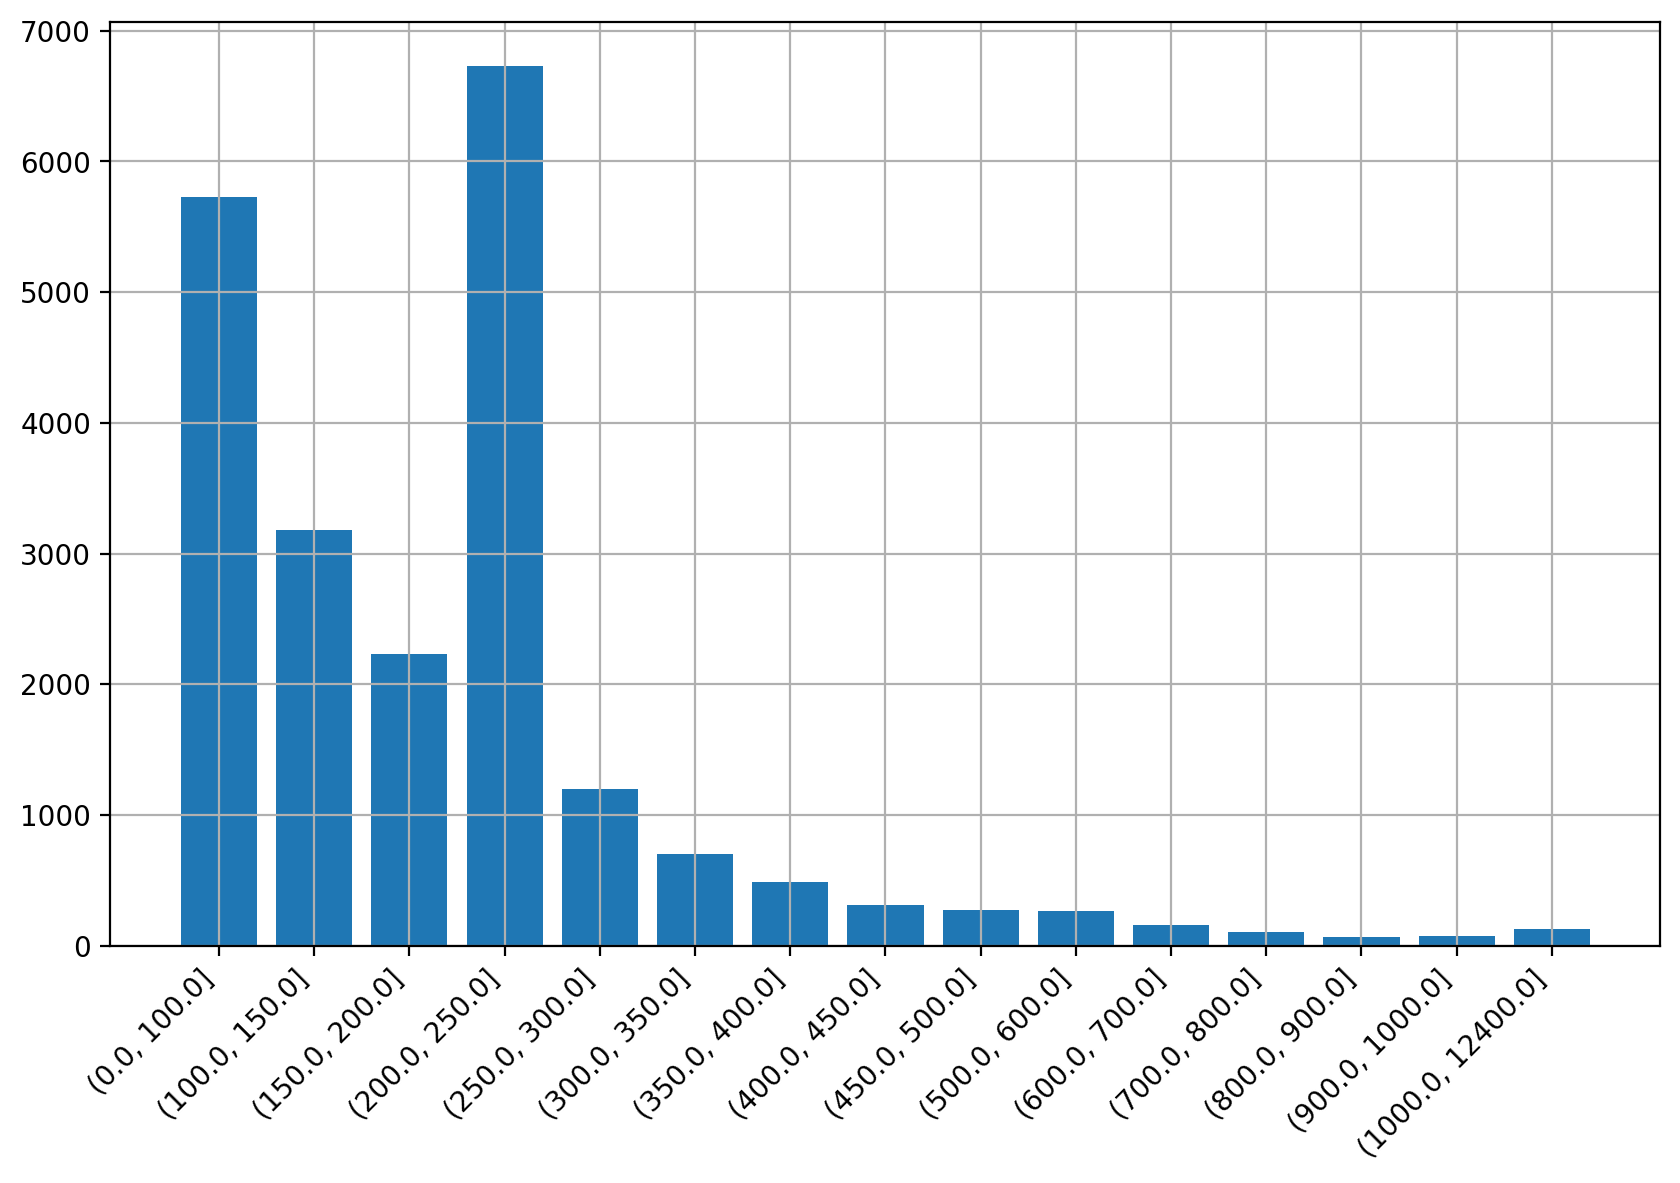

In [163]:
plt.figure(figsize=(10,6), dpi=200)
plt.bar(price_category.index.astype('str'), price_category.values )
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid()
plt.show()

In [164]:
df_reviews_zip.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,573892,2163249,2012-09-01,3226641,Meera,My boyfriend & I had a wonderful 4 day/3 night...
1,1419,38924112,2015-07-19,11308465,Marcela,Having the opportunity of arriving to Alexandr...
2,1419,44791978,2015-08-29,9580285,Marco,We have no enough words to describe how beauty...
3,1419,45957133,2015-09-07,38394721,Andrea,The listing was exceptional and an even better...
4,1419,67295154,2016-03-28,3515044,Shaun,Alexandra's home was amazing and in such a nea...


In [165]:
df_calender_zip.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,573892,2024-08-08,f,$149.00,NaN,28.0,1125.0
1,573892,2024-08-09,f,$149.00,NaN,28.0,1125.0
2,573892,2024-08-10,f,$149.00,NaN,28.0,1125.0
3,573892,2024-08-11,f,$149.00,NaN,28.0,1125.0
4,573892,2024-08-12,f,$149.00,NaN,28.0,1125.0


In [166]:
df_listing_zip['amenities']

0        ["Shampoo", "Kitchen", "Heating", "First aid k...
1        ["Shampoo", "Long term stays allowed", "Elevat...
2        ["Shampoo", "Kitchen", "Heating", "First aid k...
3        ["Gym", "Shampoo", "TV with standard cable", "...
4        ["Shampoo", "Long term stays allowed", "Elevat...
                               ...                        
21644    ["Exercise equipment", "Kitchen", "TV", "Smoke...
21645    ["Hangers", "Exercise equipment", "Pool table"...
21646    ["Shampoo", "Long term stays allowed", "Clothi...
21647    ["Shampoo", "TV", "Essentials", "Wifi", "Self ...
21648    ["Gym", "Shampoo", "Housekeeping - available a...
Name: amenities, Length: 21649, dtype: object

In [180]:
# Count the number of amenities
import ast
def count_amenities(seriees):
    list = ast.literal_eval(seriees)
    return len(list)

df_listing_zip['Amenities_Count'] = df_listing_zip['amenities'].apply(count_amenities)



<Axes: xlabel='Amenities_Count', ylabel='price'>

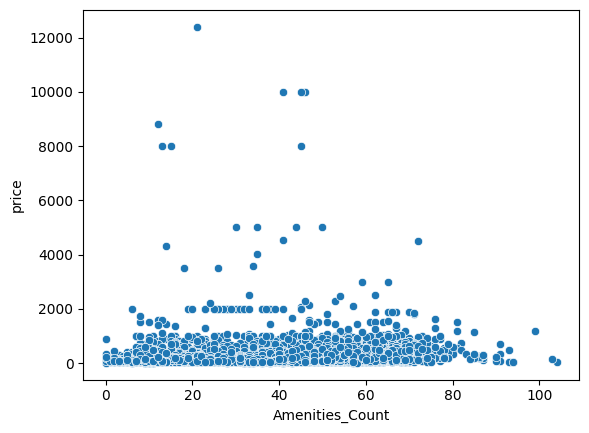

In [181]:
sns.scatterplot(data=df_listing_zip, x = 'Amenities_Count', y = 'price')

In [189]:
fig = px.scatter(df_listing_zip, x = 'Amenities_Count',
           y = 'price',
           color= 'Price_Range',
           color_continuous_scale='Viridis')
fig.show()

c:\Users\subas\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\express\_core.py:2044: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(required_grouper, sort=False)  # skip one_group groupers
c:\Users\subas\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


In [196]:
# Calculating average number for review for each price range
fig = px.scatter(df_listing_zip, x = 'number_of_reviews',
           y = 'price',
           color= 'Amenities_Count',
           color_continuous_scale='Viridis')
fig.show()